#Prediction Of Quality Of Wine

In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Importing Wine Quality Dataset

In [ ]:
WineQuality=pd.read_csv('/content/drive/MyDrive/DataMiningMiniProject(Dataset)/winequality-red.csv') #Reading the dataset using pandas library

In [ ]:
WineQuality.shape #shape provides number of instances in the left and the number of columns in the right
#The WineQuality dataset consist of 1599 instances (rows)  and 12 attribuites (columns)

(1599, 12)

In [ ]:
WineQuality.info() #Getting information about the attributes present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dividing the wine as good and bad by giving limit for the quality

In [ ]:
bins=(2,6.5,8)
group_names=['bad','good']
WineQuality['quality']=pd.cut(WineQuality['quality'],bins=bins,labels=group_names)  

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality=LabelEncoder()
WineQuality['quality']=label_quality.fit_transform(WineQuality['quality'])
#Using LabelEncoder we are converting the values of quality attribute into good(1) and bad(0)

In [ ]:
WineQuality #Displaying the whole dataset after converting the quality attribute into 0 and 1 using LabelEncoder

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
WineQuality['quality'].value_counts()  #value_counts() gives the number of instances present in unique classes of the quality attribute
#bad(0) has 1382 instances and good(1) has 217 instances

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
WineQuality.describe(include='all') 
#This statement gives a clear summary of each attribute(count,mean,standard deviation,minimum value,(25%,50%,75%)quantile,maximum value)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
WineQuality.isnull().sum() #isnull() checks whether a attribute has any NULL value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

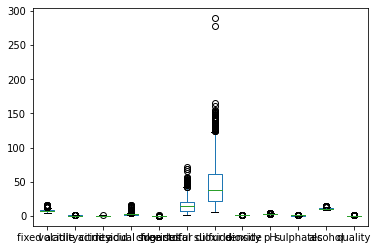

In [ ]:
WineQuality.plot.box() #Boxplot is used to check the outliers present in each attribute. BoxPlot is a efficient visualization technique

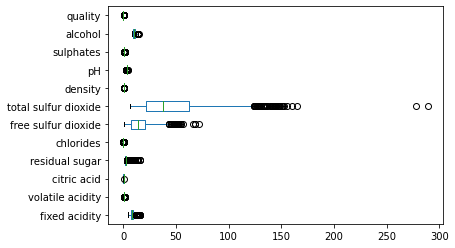

In [ ]:
WineQuality.plot.box(vert=False)  #Boxplot in horizontal manner

In [ ]:
WineQuality.duplicated().sum() #duplicated() checks whether there are any repeating values

240

Correlation table 

In [ ]:
corr=WineQuality.corr()
corr
#dataset.corr() is used  to create a correlation table which shows how each attribute is correlated with other attributes of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


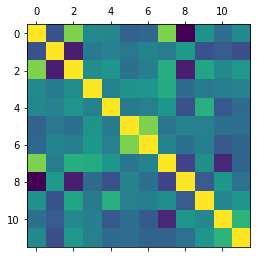

In [ ]:
plt.matshow(corr)
plt.show()
#This statement is used to show the correlation table in the form of a heatmap

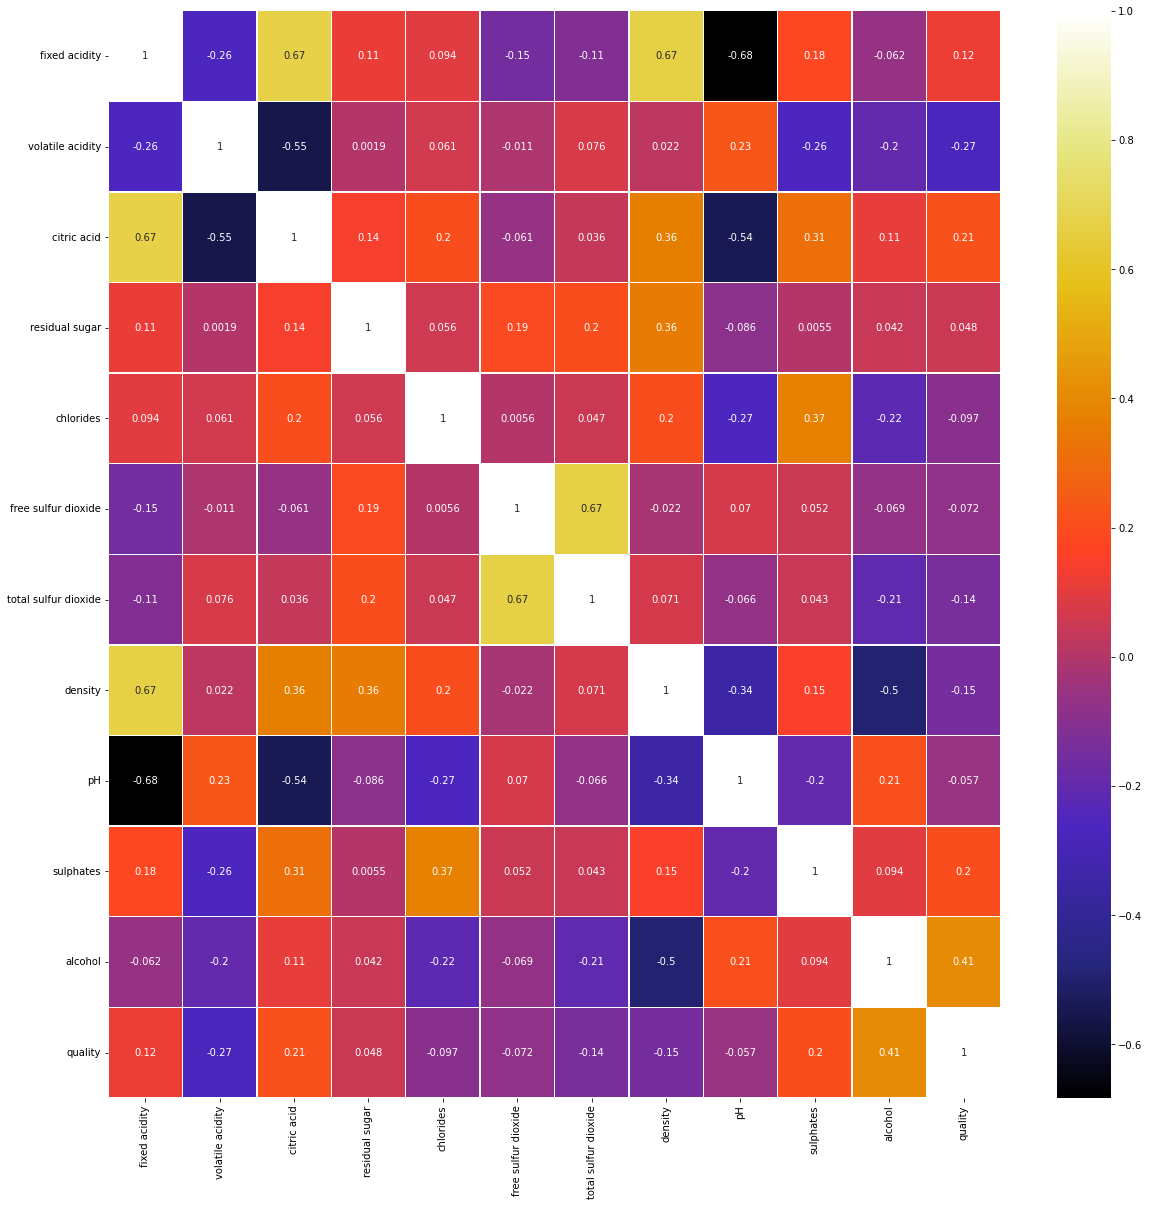

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,
            linewidth = 0.5,
            cmap = "CMRmap")
#Using seaborn library a heatmap is made, depicting the relationship between the attributes

Exploring Data 

In [ ]:
WineQuality.sort_values(['free sulfur dioxide'],ascending=True) #sorting the dataset in ascending order according to free sulfur dioxide attribute

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
535,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,0
773,7.9,0.400,0.29,1.8,0.157,1.0,44.0,0.99730,3.30,0.92,9.5,0
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,0
774,7.9,0.400,0.30,1.8,0.157,2.0,45.0,0.99727,3.31,0.91,9.5,0
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,0
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0


In [ ]:
WineQuality[WineQuality['free sulfur dioxide']>=50] #displaying the dataset where free sulfur dioxide is greater than 50

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,0
57,7.5,0.630,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
584,11.8,0.330,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,1
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,1
926,9.4,0.240,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,0
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,0
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,0


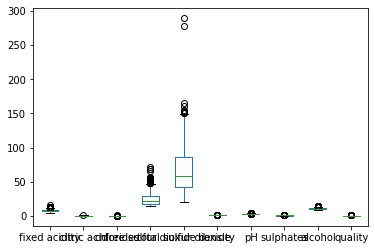

In [ ]:
WineQuality[WineQuality['free sulfur dioxide']>=15 ].plot.box() #boxplot is used to search for outliers 
#Checking for the range of outliers in the free sulfur dioxide attribute

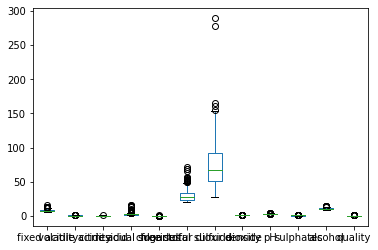

In [ ]:
WineQuality[WineQuality['free sulfur dioxide']>=20].plot.box()

Visualization Techniques

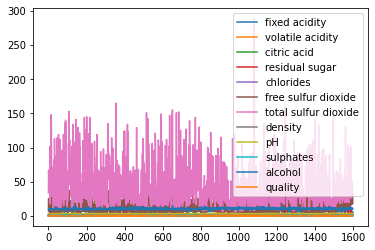

In [ ]:
WineQuality.plot() #To Checking the distribution of the datapoints

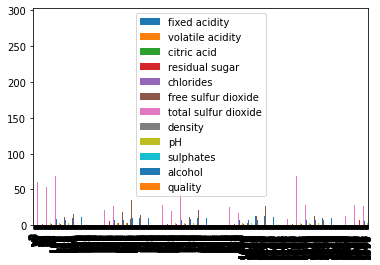

In [ ]:
WineQuality.plot.bar()

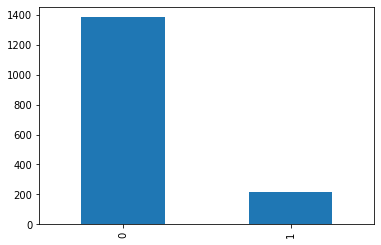

In [ ]:
WineQuality['quality'].value_counts().plot.bar() #plotting a bar graph for getting a visual idea about the unique value counts of the class attriute(quality)

Modeling

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Preparing Data

In [ ]:
X=WineQuality.iloc[:,:11]
y=WineQuality.quality

In [ ]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Applying Algorithms Before preprocessing

Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()
modelNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictionNB = modelNB.predict(X_test)

In [ ]:
print("Model Accuracy using Naive Bayes Algorithm : {}%".format(round(modelNB.score(X_test,y_test)*100,2)))

Model Accuracy using Naive Bayes Algorithm : 85.31%


Confusion matrix, without normalization


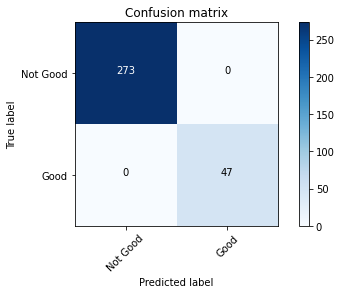

In [ ]:
cm = metrics.confusion_matrix(y_test,predictionNB)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRFC= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
modelRFC.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictionRFC = modelRFC.predict(X_test)

In [ ]:
print("Model Accuracy using Random Forest Algorithm : {}%".format(round(modelRFC.score(X_test,y_test)*100,2)))

Model Accuracy using Random Forest Algorithm : 90.94%


Confusion matrix, without normalization


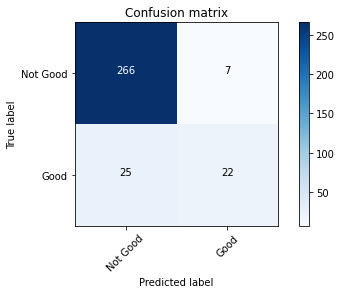

In [ ]:
cm = metrics.confusion_matrix(y_test,predictionRFC)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC
modelSVM = SVC(kernel='linear', random_state=0)  
modelSVM.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictionSVM = modelSVM.predict(X_test)

In [ ]:
print("Model Accuracy using Support Vector Machine Algorithm : {}%".format(round(modelSVM.score(X_test,y_test)*100,2)))

Model Accuracy using Support Vector Machine Algorithm : 85.31%


Confusion matrix, without normalization


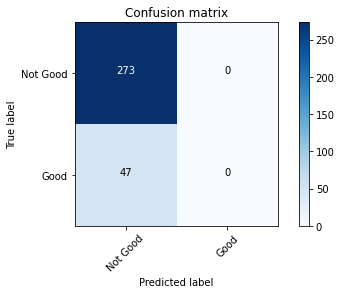

In [ ]:
cm = metrics.confusion_matrix(y_test,predictionSVM)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

In [ ]:
WineQuality.drop(labels='volatile acidity',axis=1,inplace=True)

In [ ]:
WineQuality.drop(labels='residual sugar',axis=1,inplace=True)

In [ ]:
WineQuality

,fixed acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


#OUTLIERS

Detection of Outliers

In [ ]:
WineQuality.columns

Index(['fixed acidity', 'citric acid', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

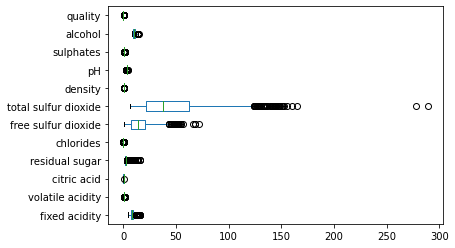

In [ ]:
WineQuality.plot.box(vert=False)

Outliers By Inter-Quantile Range Method`

In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
FA_outliers = detect_outliers_iqr(WineQuality['fixed acidity'].values)
print("fixed acidity :",FA_outliers)

fixed acidity : [12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.3, 13.3, 13.3, 13.4, 13.5, 13.7, 13.7, 13.8, 14.0, 14.3, 15.0, 15.0, 15.5, 15.5, 15.6, 15.6, 15.9]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
CA_outliers = detect_outliers_iqr(WineQuality['citric acid'].values)
print("citric acid :",CA_outliers)

citric acid : [1.0]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
C_outliers = detect_outliers_iqr(WineQuality['chlorides'].values)
print("chlorides :",C_outliers)

chlorides : [0.012, 0.012, 0.034, 0.038, 0.038, 0.039, 0.039, 0.039, 0.039, 0.12, 0.12, 0.12, 0.121, 0.121, 0.122, 0.122, 0.122, 0.122, 0.122, 0.122, 0.122, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.124, 0.124, 0.124, 0.125, 0.126, 0.127, 0.128, 0.132, 0.132, 0.132, 0.132, 0.136, 0.13699999999999998, 0.14300000000000002, 0.145, 0.146, 0.147, 0.14800000000000002, 0.152, 0.152, 0.153, 0.157, 0.157, 0.157, 0.159, 0.161, 0.165, 0.166, 0.166, 0.166, 0.168, 0.16899999999999998, 0.17, 0.171, 0.171, 0.172, 0.174, 0.17600000000000002, 0.17800000000000002, 0.17800000000000002, 0.18600000000000005, 0.19, 0.194, 0.2, 0.205, 0.205, 0.213, 0.214, 0.214, 0.214, 0.21600000000000005, 0.222, 0.226, 0.226, 0.23, 0.235, 0.236, 0.241, 0.243, 0.25, 0.263, 0.267, 0.27, 0.332, 0.337, 0.341, 0.343, 0.358, 0.36, 0.368, 0.369, 0.387, 0.401, 0.403, 0.413, 0.414, 0.414, 0.415, 0.415, 0.415, 0.422, 0.464, 0.467, 0.61, 0.611]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
FSD_outliers = detect_outliers_iqr(WineQuality['free sulfur dioxide'].values)
print("free sulfur dioxide :",FSD_outliers)

free sulfur dioxide : [43.0, 43.0, 43.0, 45.0, 45.0, 45.0, 46.0, 47.0, 48.0, 48.0, 48.0, 48.0, 50.0, 50.0, 51.0, 51.0, 51.0, 51.0, 52.0, 52.0, 52.0, 53.0, 54.0, 55.0, 55.0, 57.0, 66.0, 68.0, 68.0, 72.0]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
TSD_outliers = detect_outliers_iqr(WineQuality['total sulfur dioxide'].values)
print("total sulfur dioxide :",TSD_outliers)

total sulfur dioxide : [124.0, 124.0, 124.0, 125.0, 125.0, 126.0, 127.0, 127.0, 128.0, 128.0, 129.0, 129.0, 129.0, 130.0, 131.0, 131.0, 131.0, 133.0, 133.0, 133.0, 134.0, 134.0, 135.0, 135.0, 136.0, 136.0, 139.0, 140.0, 141.0, 141.0, 141.0, 142.0, 143.0, 143.0, 144.0, 144.0, 144.0, 145.0, 145.0, 145.0, 147.0, 147.0, 147.0, 148.0, 148.0, 149.0, 151.0, 151.0, 152.0, 153.0, 155.0, 160.0, 165.0, 278.0, 289.0]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
D_outliers = detect_outliers_iqr(WineQuality['density'].values)
print("density :",D_outliers)

density : [0.99007, 0.99007, 0.9902, 0.99064, 0.99064, 0.9908, 0.99084, 0.9912, 0.9915, 0.99154, 0.99157, 0.9916, 0.9916, 0.99162, 0.9917, 0.99182, 0.99182, 0.99191, 0.9921, 0.9922, 0.9922, 1.0014, 1.0014, 1.0014, 1.0014, 1.0014, 1.0014, 1.0015, 1.0015, 1.0018, 1.0021, 1.0021, 1.0022, 1.0022, 1.00242, 1.00242, 1.0026, 1.0026, 1.00289, 1.00315, 1.00315, 1.00315, 1.0032, 1.00369, 1.00369]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
pH_outliers = detect_outliers_iqr(WineQuality['pH'].values)
print("pH :",pH_outliers)

pH : [2.74, 2.86, 2.87, 2.88, 2.88, 2.89, 2.89, 2.89, 2.89, 2.9, 2.92, 2.92, 2.92, 2.92, 3.69, 3.69, 3.69, 3.69, 3.7, 3.71, 3.71, 3.71, 3.71, 3.72, 3.72, 3.72, 3.74, 3.75, 3.78, 3.78, 3.85, 3.9, 3.9, 4.01, 4.01]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
S_outliers = detect_outliers_iqr(WineQuality['sulphates'].values)
print("sulphates :",S_outliers)

sulphates : [1.0, 1.01, 1.02, 1.02, 1.02, 1.03, 1.03, 1.04, 1.04, 1.05, 1.05, 1.05, 1.06, 1.06, 1.06, 1.06, 1.07, 1.07, 1.08, 1.08, 1.08, 1.09, 1.1, 1.1, 1.11, 1.12, 1.13, 1.13, 1.14, 1.14, 1.15, 1.16, 1.17, 1.17, 1.17, 1.17, 1.17, 1.18, 1.18, 1.18, 1.2, 1.22, 1.26, 1.28, 1.28, 1.31, 1.33, 1.34, 1.36, 1.36, 1.36, 1.56, 1.59, 1.61, 1.62, 1.95, 1.95, 1.98, 2.0]


In [ ]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25) # 25 % of Data
    q3 = np.percentile(data, 75) # 75 % of Data
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
A_outliers = detect_outliers_iqr(WineQuality['alcohol'].values)
print("alcohol :",A_outliers)

alcohol : [13.566666666666698, 13.6, 13.6, 13.6, 13.6, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.9]


Medians of all columns

In [ ]:
medianFA = np.median(WineQuality['fixed acidity'])
medianCA = np.median(WineQuality['citric acid'])
medianC = np.median(WineQuality['chlorides'])
medianFSD = np.median(WineQuality['free sulfur dioxide'])
medianTSD = np.median(WineQuality['total sulfur dioxide'])
medianD = np.median(WineQuality['density'])
medianpH = np.median(WineQuality['pH'])
medianS = np.median(WineQuality['sulphates'])
medianA = np.median(WineQuality['alcohol'])

Handling Outliers

In [ ]:
WineQuality['fixed acidity']=WineQuality['fixed acidity'].replace(FA_outliers,medianFA) #Replacing columns with their respective medians

In [ ]:
WineQuality['citric acid']=WineQuality['citric acid'].replace(CA_outliers,medianCA)

In [ ]:
WineQuality['chlorides']=WineQuality['chlorides'].replace(C_outliers,medianC)

In [ ]:
WineQuality['free sulfur dioxide']=WineQuality['free sulfur dioxide'].replace(FSD_outliers,medianFSD)

In [ ]:
WineQuality['total sulfur dioxide']=WineQuality['total sulfur dioxide'].replace(TSD_outliers,medianTSD)

In [ ]:
WineQuality['density']=WineQuality['density'].replace(D_outliers,medianD)

In [ ]:
WineQuality['pH']=WineQuality['pH'].replace(pH_outliers,medianpH)

In [ ]:
WineQuality['sulphates']=WineQuality['sulphates'].replace(S_outliers,medianS)

In [ ]:
WineQuality['alcohol']=WineQuality['alcohol'].replace(A_outliers,medianA)

In [ ]:
WineQuality

,fixed acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


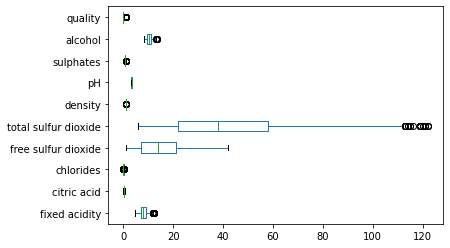

In [ ]:
WineQuality.plot.box(vert=False)

Data Preparation after Handling Outliers

In [ ]:
UX=WineQuality.iloc[:,:9]
Uy=WineQuality.quality
UX.columns

Index(['fixed acidity', 'citric acid', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
Uy

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Split the data
UX_train,UX_test,Uy_train,Uy_test = train_test_split(UX,Uy, test_size=0.2, random_state=42)

Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
UmodelNB=GaussianNB()
UmodelNB.fit(UX_train,Uy_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
UpredictionNB=UmodelNB.predict(UX_test)

In [ ]:
print("Model Accuracy using Naive Bayes Algorithm : {}%".format(round(UmodelNB.score(UX_test,Uy_test)*100,2)))

Model Accuracy using Naive Bayes Algorithm : 83.44%


Confusion matrix, without normalization


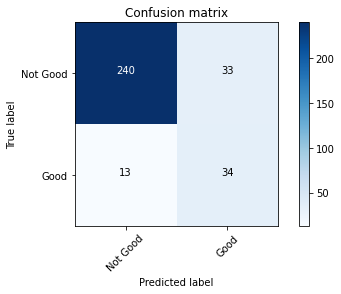

In [ ]:
cm = metrics.confusion_matrix(Uy_test,UpredictionNB)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

Random Forest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
UmodelRFC= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
UmodelRFC.fit(UX_train, Uy_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
UpredictionRFC=UmodelRFC.predict(UX_test)

In [ ]:
print("Model Accuracy using Random Forest Classifier Algorithm : {}%".format(round(UmodelRFC.score(UX_test,Uy_test)*100,2)))

Model Accuracy using Random Forest Classifier Algorithm : 90.0%


Confusion matrix, without normalization


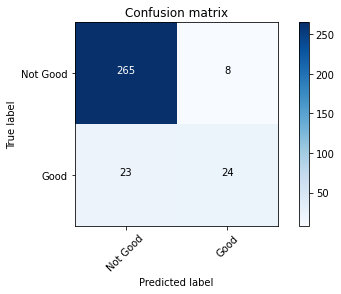

In [ ]:
cm = metrics.confusion_matrix(Uy_test,UpredictionRFC)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
UmodelSVM = SVC(kernel='linear', random_state=0)  
UmodelSVM.fit(UX_train, Uy_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
UpredictionSVM=UmodelSVM.predict(UX_test)

In [ ]:
print("Model Accuracy using Support Vector Machine Algorithm : {}%".format(round(UmodelSVM.score(UX_test,Uy_test)*100,2)))

Model Accuracy using Support Vector Machine Algorithm : 85.31%


Confusion matrix, without normalization


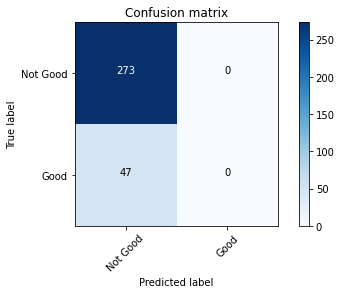

In [ ]:
cm = metrics.confusion_matrix(Uy_test,UpredictionSVM)
plot_confusion_matrix(cm, classes=['Not Good','Good'])

Model Comparison 
Before VS After Handling Outlier

In [ ]:
print("Naive Bayes Algorithm")
print("Before Handling Outliers : {}%".format(round(modelNB.score(X_test,y_test)*100,2)))
print("After Handling Outliers : {}%".format(round(UmodelNB.score(UX_test,Uy_test)*100,2)))

Naive Bayes Algorithm
Before Handling Outliers : 85.31%
After Handling Outliers : 83.44%


In [ ]:
print("Random Forest Classifier Algorithm")
print("Before Handling Outliers : {}%".format(round(modelRFC.score(X_test,y_test)*100,2)))
print("After Handling Outliers : {}%".format(round(UmodelRFC.score(UX_test,Uy_test)*100,2)))

Random Forest Classifier Algorithm
Before Handling Outliers : 90.94%
After Handling Outliers : 90.0%


In [ ]:
print("Support Vector Machine Algorithm")
print("Before Handling Outliers : {}%".format(round(modelSVM.score(X_test,y_test)*100,2)))
print("After Handling Outliers : {}%".format(round(UmodelSVM.score(UX_test,Uy_test)*100,2)))

Support Vector Machine Algorithm
Before Handling Outliers : 85.31%
After Handling Outliers : 85.31%
